In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/final_dataset3.csv')
%pip install rdkit

import rdkit
from rdkit import Chem

In [ ]:
df = pd.DataFrame(data)

smiles = df.at[0, 'reactant_1']

print(smiles)

In [81]:
#smiles = 'C/C1=C\\C[C@H]([C+](C)C)CC/C(C)=C/CC1'

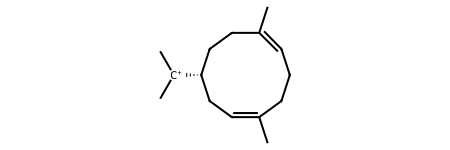

In [82]:
mol = Chem.MolFromSmiles(smiles)
mol

In [83]:
type(mol)
rdkit.Chem.rdchem.Mol
from rdkit import Chem
from rdkit.Chem import AllChem

In [84]:
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=100)
fp

In [85]:
import numpy as np
vec = np.array(fp)
vec

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [96]:
def vec(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=100)
        vec = np.array(fp)
        return vec
    else:
        return None

In [ ]:
df['product_new'] = df['product'].apply(vec)
data

In [130]:
del data['product']

In [131]:
data

,Unnamed: 0,CanonicalizedReaction,Yield,fingerprint_2,fingerprint_1,product_new
0,0,CCOC(=O)C(C)c1ccc2c(c1)Cc1cccnc1S2>>CC(C(=O)O)...,88.3,None,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ..."
1,1,CC(C(=O)O)c1ccc(O)c(C(=O)c2cccnc2Cl)c1>>CC(C(=...,72.7,None,"[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
2,2,CC(O)c1ccc(-c2ccc([N+](=O)[O-])cc2)o1>>CC(O)c1...,71.0,None,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ..."
3,3,CCC(=O)c1ccc(-c2ccc(Cl)cc2)o1>>CCC(O)c1ccc(-c2...,99.0,None,"[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ..."
4,4,CC=CC(=O)C=C(C)CCC=C(C)C>>C/C=C/C(=O)C1C(C)=CC...,50.0,None,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
...,...,...,...,...,...,...
24626,24626,CC(Cc1ccccc1)C(=O)O.Nc1ccc2oc(-c3ccncc3)nc2c1>...,75.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, ..."
24627,24627,CC(=O)c1cccc(C(C)N=C=O)c1.O=C1N[C@H](Cc2ccccc2...,80.0,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
24628,24628,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,62.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, ..."
24629,24629,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,58.0,"[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ..."


In [123]:
%pip install drfp

In [133]:
from drfp import DrfpEncoder
df = pd.DataFrame(data)

rxn_smiles = df.at[0, 'CanonicalizedReaction']

fps = DrfpEncoder.encode(rxn_smiles, n_folded_length=100)
fps

[array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8)]

In [134]:
def encode_reaction(reaction_smiles):
    return DrfpEncoder.encode(reaction_smiles, n_folded_length=100)

df['reaction_new'] = df['CanonicalizedReaction'].apply(encode_reaction)

In [136]:
data

,Unnamed: 0,CanonicalizedReaction,Yield,fingerprint_2,fingerprint_1,product_new,reaction_new
0,0,CCOC(=O)C(C)c1ccc2c(c1)Cc1cccnc1S2>>CC(C(=O)O)...,88.3,None,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,..."
1,1,CC(C(=O)O)c1ccc(O)c(C(=O)c2cccnc2Cl)c1>>CC(C(=...,72.7,None,"[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,..."
2,2,CC(O)c1ccc(-c2ccc([N+](=O)[O-])cc2)o1>>CC(O)c1...,71.0,None,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,..."
3,3,CCC(=O)c1ccc(-c2ccc(Cl)cc2)o1>>CCC(O)c1ccc(-c2...,99.0,None,"[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,..."
4,4,CC=CC(=O)C=C(C)CCC=C(C)C>>C/C=C/C(=O)C1C(C)=CC...,50.0,None,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,..."
...,...,...,...,...,...,...,...
24626,24626,CC(Cc1ccccc1)C(=O)O.Nc1ccc2oc(-c3ccncc3)nc2c1>...,75.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,..."
24627,24627,CC(=O)c1cccc(C(C)N=C=O)c1.O=C1N[C@H](Cc2ccccc2...,80.0,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,..."
24628,24628,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,62.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,..."
24629,24629,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,58.0,"[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...","[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."


In [137]:
del data['CanonicalizedReaction'], data['Yield']

In [138]:
data

,Unnamed: 0,fingerprint_2,fingerprint_1,product_new,reaction_new
0,0,None,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,..."
1,1,None,"[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,..."
2,2,None,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,..."
3,3,None,"[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,..."
4,4,None,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,..."
...,...,...,...,...,...
24626,24626,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,..."
24627,24627,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,..."
24628,24628,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,..."
24629,24629,"[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...","[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."


In [ ]:
df = pd.DataFrame(data)

df = df[['reaction_new', 'fingerprint_1', 'fingerprint_2', 'product_new']]
df

In [147]:
df = pd.DataFrame(df)

df['reaction_new'] = df['reaction_new'].astype(str)

# Разделяем каждую цифру 0 и 1 в строке на отдельные клетки
df['reaction_new'] = df['reaction_new'].apply(lambda x: ' '.join(list(x)))

# Теперь каждое 0 и 1 находится в отдельной клетке столбца

df['fingerprint_1'] = df['fingerprint_1'].astype(str)

df['fingerprint_1'] = df['fingerprint_1'].apply(lambda x: ' '.join(list(x)))

df['fingerprint_2'] = df['fingerprint_2'].astype(str)

df['fingerprint_2'] = df['fingerprint_2'].apply(lambda x: ' '.join(list(x)))

df['product_new'] = df['product_new'].astype(str)

df['product_new'] = df['product_new'].apply(lambda x: ' '.join(list(x)))
df

,reaction_new,fingerprint_1,fingerprint_2,product_new
0,"[ a r r a y ( [ 0 , 1 ...",[ 0 1 1 1 0 0 0 0 1 1 0 ...,N o n e,[ 0 1 0 1 0 1 0 0 1 1 0 ...
1,"[ a r r a y ( [ 0 , 1 ...",[ 0 1 0 1 0 1 0 0 1 1 0 ...,N o n e,[ 0 1 0 1 1 1 0 0 1 1 1 ...
2,"[ a r r a y ( [ 0 , 0 ...",[ 1 1 0 0 0 1 0 0 1 0 0 ...,N o n e,[ 1 1 0 0 0 1 0 0 1 1 0 ...
3,"[ a r r a y ( [ 0 , 0 ...",[ 1 1 0 0 1 0 0 0 1 0 0 ...,N o n e,[ 1 1 0 0 0 1 0 0 1 0 0 ...
4,"[ a r r a y ( [ 1 , 0 ...",[ 0 0 0 0 0 0 0 1 0 0 0 ...,N o n e,[ 0 0 1 0 1 0 0 0 1 0 0 ...
...,...,...,...,...
24626,"[ a r r a y ( [ 0 , 0 ...",[ 0 1 0 0 0 0 0 0 1 0 0 ...,[ 1 0 0 0 0 0 0 1 1 1 1 ...,[ 1 1 0 0 0 0 0 1 1 1 1 ...
24627,"[ a r r a y ( [ 0 , 0 ...",[ 1 1 0 1 0 0 0 0 1 1 0 ...,[ 1 1 0 0 0 0 0 0 1 0 0 ...,[ 0 0 0 0 1 0 0 0 1 0 1 ...
24628,"[ a r r a y ( [ 0 , 0 ...",[ 1 0 0 0 0 1 0 0 1 1 0 ...,[ 0 0 0 0 0 0 0 0 1 0 0 ...,[ 1 0 0 0 0 1 0 0 1 0 0 ...
24629,"[ a r r a y ( [ 0 , 1 ...",[ 0 1 1 0 0 0 0 1 0 0 1 ...,[ 1 0 0 0 0 1 0 1 1 0 0 ...,[ 1 1 1 0 0 1 0 1 1 0 1 ...


In [148]:
df.to_csv('/content/final_dataset5.csv', index=False)